In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('/content/placement.csv')
df.head()

,cgpa,iq,placed
0,6.35,83,0
1,6.16,91,0
2,6.39,92,0
3,6.66,88,0
4,6.13,93,0


In [37]:
X = df.drop(columns=['placed'])
y = df['placed']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["cgpa", "iq"]].values)
y = df["placed"].values

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

<Axes: xlabel='cgpa', ylabel='iq'>

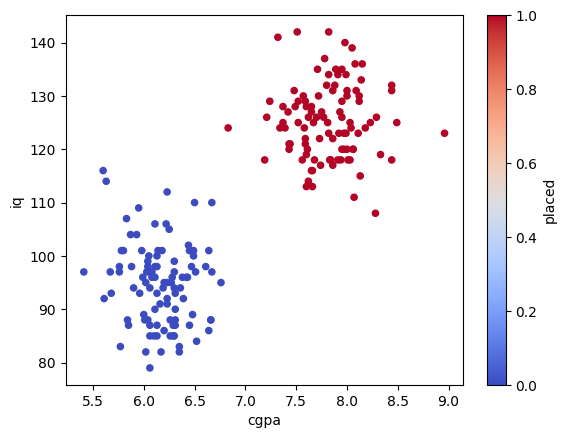

In [38]:
df.plot(kind='scatter',x='cgpa',y='iq',c='placed',cmap='coolwarm')

In [39]:
class Perceptron:
  def __init__(self, epochs=100, learning_rate=0.01):
    self.epochs = epochs
    self.learning_rate = learning_rate
    self.weights = None

  def fit(self, X, y):
    X = np.insert(X, 0, 1, axis=1)
    self.weights = np.ones(X.shape[1])

    for i in range(self.epochs):
      j = np.random.randint(X.shape[0])

      y_hat = self.step(X[j])
      self.weights = self.weights + (self.learning_rate * (y[j] - y_hat) * X[j])

    return self.weights[0], self.weights[1:]

  def step(self, X):
    linear_output = np.dot(X, self.weights)
    return 1 if linear_output >= 0 else 0

  def decision_boundary(self, x_vals):
      m = -self.weights[1] / self.weights[2]
      b = -self.weights[0] / self.weights[2]
      return m * x_vals + b

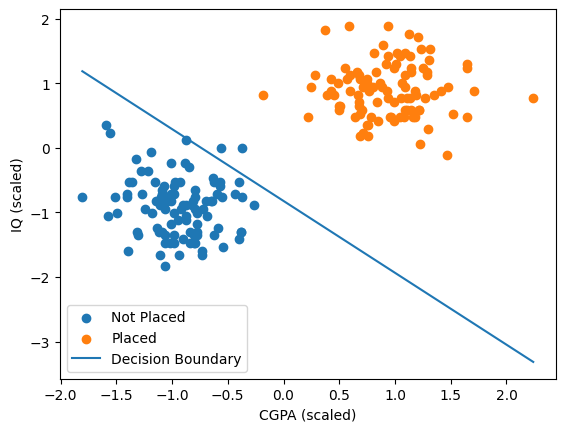

In [44]:
# Train
p = Perceptron(epochs=1000, learning_rate=0.01)
p.fit(X_scaled, y)

# Decision boundary in scaled space
x_vals = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100)
y_vals = p.decision_boundary(x_vals)

# Plot
plt.scatter(X_scaled[y == 0][:, 0], X_scaled[y == 0][:, 1], label="Not Placed")
plt.scatter(X_scaled[y == 1][:, 0], X_scaled[y == 1][:, 1], label="Placed")
plt.plot(x_vals, y_vals, label="Decision Boundary")

plt.xlabel("CGPA (scaled)")
plt.ylabel("IQ (scaled)")
plt.legend()
plt.show()